# Simulation of First Two Reactions of Glycolysis ( Metabolic Pathway )

In [1]:
# importing necessary modules/functions
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from celluloid import Camera
import IPython.display as IPdisplay
from PIL import Image

## The reactions are as follows : 

### Glucose + ATP -->  Glucose-6-phosphate + ADP <br> Glucose-6-phosphate --> Fructose-6-phosphate <br> Glucose-6-phosphate + ATP --> PI + ADP  <br> ADP + P --> ATP <br> ATP --> ADP + P 

In [2]:
# Defining constants of the reactions : 
Vmax1 = 1398  # mM/min
Katp1 = 0.1  # mM
Kglu1 = 0.37  # mM
k6 = 68.48  # 1/min
k2 = 2.26   # mM/min
Vmax3 = 140.282 # mM/min
Kg6p3 = 0.8  # mM
Kf6p3 = 0.15  # mM
k7 = 3.21  # 1/min


In [3]:
# defining the ode matrix returning function
def dydt_matrix(y,t):
    SM = np.zeros((6,5))
    RM = np.zeros((5))
    # Defining the SM
    SM[0,0] = -1 
    SM[1,0],SM[1,1],SM[1,2] = 1 , -1, -1
    SM[2,2] = 1
    SM[3,0],SM[3,1],SM[3,3],SM[3,4] = -1 , -1 , 1 , -1
    SM[4,0],SM[4,1],SM[4,3],SM[4,4] = 1 , 1 , -1 , 1
    SM[5,1] = 1
    y0, y1, y2, y3, y4, y5 = y
    RM[0] = Vmax1*y3*y0/(1 + y3/Katp1 + y0/Kglu1 )
    RM[1] = k2*y1*y3
    RM[2] = Vmax3*( y1/Kg6p3 - y2/Kf6p3 )/( 1 + y1/Kg6p3 + y2/Kf6p3 )
    RM[3] = k6*y4 
    RM[4] = k7*y3
    dydt = np.dot(SM,RM) 
    return [ dydt[0] , dydt[1] , dydt[2] , dydt[3] , dydt[4] , dydt[5] ]

In [4]:
# defining the initial conditions 
y0 = [12.87 , 1 , 0 , 2.5 , 1.4 , 0]
tspan = np.linspace(0,1.5,100)                    

In [5]:
# Solving the ODe systm
sol = odeint(dydt_matrix, y0, tspan)

In [6]:
def plot_rxn(t,sol,fig):
    plt.plot(t,sol[:,0] , label = 'Gluc')
    plt.plot(t,sol[:,1] , label = 'G6P')
    plt.plot(t,sol[:,2] , label = 'F6P')
    plt.plot(t,sol[:,3] , label = 'ATP')
    plt.plot(t,sol[:,4] , label = 'ADP')
    plt.plot(t,sol[:,5] , label = 'Pi')
    plt.xlabel('Time,min')
    plt.ylabel('Conc, mM')
    
    
    


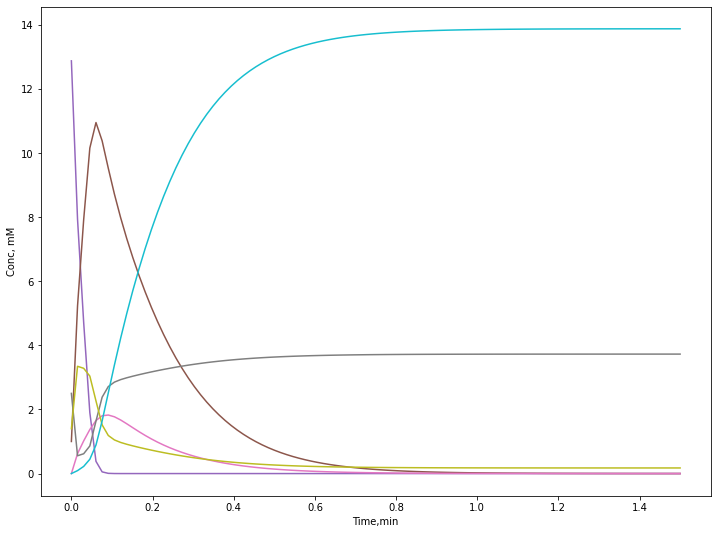

In [7]:
fig = plt.figure(figsize=(12, 9))
camera = Camera(fig)
for i in range(1,len(tspan)+1): 
    sol_plot = sol[0:i,:]
    t = tspan[:i]
    plot_rxn(t,sol_plot,fig)
    camera.snap()
    
animation = camera.animate()
animation.save('glycolysis_anim.gif', writer = 'pillow', fps = 100) 
Image.open('glycolysis_anim.gif')
IPdisplay.Image(url='glycolysis_anim.gif')